<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Semana8_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y Analítica de Datos 
___ 
Semana 8: Data Analysis with Python (IBM)   
Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338



#Módulo 5 - Model Evaluation

##Model Evaluation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header =  None)
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']
df.columns = headers
df.replace('?', np.nan, inplace=True)

La evaluación de un modelo proporciona información sobre cómo se comporta el modelo en un caso real. Se utiliza una muestra de los datos para evaluar el desempeño con datos completamente nuevos para el modelo.
Antes de comenzar el análisis se divide al conjunto de datos para obtener conjuntos de datos utilizados para entrenar al modelo y para posteriormente evaluar su desempeño con un conjunto de datos completamente nuevo para el modelo.



*   Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.
*   Se construye y entrena el modelo con el conjunto de entrenamiento.
*   Utilizar el conjunto de prueba para evaluar el desempeño del modelo predictivo.  



La función train_test_split es utilizada para dividir el conjunto de datos.

In [3]:
df['price'] = pd.to_numeric(df['price'])
media = np.mean(df.price)
df['price'] = df['price'].replace(np.nan, media)

In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'])
media = np.mean(df.horsepower)
df['horsepower'] = df['horsepower'].replace(np.nan, media)

In [5]:
df['highway_mpg'] = pd.to_numeric(df['highway_mpg'])
media = np.mean(df.highway_mpg)
df['highway_mpg'] = df['highway_mpg'].replace(np.nan, media)

In [6]:
x_data = df[['horsepower']]
y_data = df[['price']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)#Divide al conjunto de datos en dos conjuntos, entrenamiento y prueba.

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)#Código para verificar el tamaño de los conjuntos

(143, 1) (62, 1) (143, 1) (62, 1)


Se utiliza el procedimiento de validación cruzada para evitar problemas en la precisión y para disminuir el error generalizado del modelo.

Se realiza un uso más efectivo de los datos (cada observación es utilizada tanto para entrenamiento como para prueba).

En este método, el conjunto de datos es dividido k-veces en grupos de mismo tamaño, cada grupo es referido como un fold.

El proceso se repite hasta que cada grupo fue utilizado tanto para entrenamiento como para prueba del modelo. Al final se utilizan los resultados promedio como estimador de los errores del modelo.

La función cross_val_score se utiliza para aplicar el proceso de validación cruzada a un modelo.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression()
scores = cross_val_score(modelo, x_data, y_data, cv = 3) #cv representa el número de particiones
#Esta función regresa un arreglo de scores uno para cada partición que fue elegida como conjunto de prueba

In [ ]:
scores

array([0.63693442, 0.44250032, 0.39185069])

La función cross_val_predict tiene un desempeño similar, pero regresa el valor que fue obtenido para cada elemento cuando estaba en el conjunto de prueba.

In [10]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(modelo, x_data, y_data, cv=3) #Las predicciones son almacenadas en el array

In [ ]:
yhat #Valores de las predicciones usando validación cruzada

array([[13560.17858685],
       [13560.17858685],
       [19237.97893214],
       [12371.8017704 ],
       [14088.34606083],
       [13428.13671836],
       [13428.13671836],
       [13428.13671836],
       [17389.39277321],
       [20030.23014311],
       [12239.7599019 ],
       [12239.7599019 ],
       [14880.5972718 ],
       [14880.5972718 ],
       [14880.5972718 ],
       [22935.15125   ],
       [22935.15125   ],
       [22935.15125   ],
       [ 5241.54087167],
       [ 8146.46197856],
       [ 8146.46197856],
       [ 7882.37824157],
       [ 7882.37824157],
       [12371.8017704 ],
       [ 7882.37824157],
       [ 7882.37824157],
       [ 7882.37824157],
       [12371.8017704 ],
       [10523.21561147],
       [18049.60211568],
       [ 6561.95955662],
       [ 8938.71318953],
       [ 6826.04329361],
       [ 8938.71318953],
       [ 8938.71318953],
       [ 8938.71318953],
       [ 8938.71318953],
       [10259.13187448],
       [10259.13187448],
       [10259.13187448],


##Over-fitting, Under-fitting and Model Selection

El objetivo de la selección del modelo es determinar el modelo que mejor se ajuste a los datos, por ejemplo, el orden de la función polinomial.  
El concepto de under-fitting se refiere a cuando el modelo es demasiado simple para describir el comportamiento de los datos.  
El concepto de over-fitting es cuando el modelo es muy flexible y se ajusta al ruido en lugar de a la función.  
El mejor modelo se puede obtener al graficar la complejidad del modelo vs alguna métrica del modelo. Para obtener el mejor modelo se obtienen las graficas de desempeño de los datos de entrenamiento y de prueba. Se selecciona el modelo que minimiza los errores en los datos de prueba.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
rsqu_test = []
order = [1, 2, 3, 4] #Lista con el orden de los diferentes polinomios
for n in order:
  pr = PolynomialFeatures(degree=n) #Se define la función de preprocesamiento para transformar los datos
  x_train_pr = pr.fit_transform(x_train[['horsepower']]) #Se transforman los datos de entrada del conjunto de entrenamiento
  x_test_pr = pr.fit_transform(x_test[['horsepower']]) #Se transforman los datos de entrada del conjunto de prueba
  modelo.fit(x_train_pr, y_train) #Se entrena el modelo
  rsqu_test.append(modelo.score(x_test_pr, y_test)) #Se obtiene el valor de las métricas de error utilizando los conjuntos de prueba

In [ ]:
rsqu_test

[0.3331272902078518,
 0.3028209535830818,
 0.4265094170803412,
 0.5417486692589754]

##Ridge Regression

Ridge Regression previene el sobre-entrenamiento. Controla la magnitud de los coeficientes que tienden a crecer demasiado al intrducir el parámetro alfa.  
Alfa es un parámetro que se selecciona antes de entrenar el modelo.
Si alfa es demasiado grande, entonces los coeficientes tenderán a cero y el polinomio estará sub-entrenado para los datos.

Para seleccionar alfa se utiliza la validación cruzada.

In [12]:
from sklearn.linear_model import Ridge

In [ ]:
r_model = Ridge(alpha=0.01) #Definición del modelo Ridge con alfa
pr = PolynomialFeatures(degree=8) #Se define la función de preprocesamiento para transformar los datos
x_train_r = pr.fit_transform(x_train[['horsepower']]) 
x_test_r = pr.fit_transform(x_test[['horsepower']]) 
r_model.fit(x_train_r, y_train) 
yhat = r_model.predict(x_train_r)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.89233e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


##Grid Search

Grid search permite probar con diferentes hiperparámetros para encontrar el mejor modelo. Grid search es un método para iterar a lo largo de estos hiperparámetros utilizando validación cruzada. Para cada combinación de hiperparámetros se calcula el error con la finalidad de comparar los modelos. Se selecciona el modelo que minimiza el error.

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
parametros = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000]}] #Parámetros para realizar la búsqueda de la mejor combinación con gridsearch
rr = Ridge()
grid_1 = GridSearchCV(rr, parametros, cv=4)
grid_1.fit(df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']], y_data)
grid_1.best_estimator_ #Se obtiene el mejor valor utilizando el atributo

Ridge(alpha=1000)

In [16]:
scores = grid_1.cv_results_

In [17]:
scores['mean_test_score'] #Se muestran los valores de las métricas utilizando los parámetros indicados

array([0.66688746, 0.6668878 , 0.66689085, 0.6669211 , 0.66720135,
       0.6686912 ])

In [25]:
parametros = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000]}, {'fit_intercept':[True, False]}] #Parámetros para realizar la búsqueda de la mejor combinación con gridsearch
rr = Ridge()
grid_1 = GridSearchCV(rr, parametros, cv=4, return_train_score=True)
grid_1.fit(df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']], y_data)
grid_1.best_estimator_ #Se obtiene el mejor valor utilizando el atributo

Ridge(alpha=1000)

In [26]:
scores = grid_1.cv_results_

In [27]:
for param, mean_val, mean_test in zip(scores['params'], scores['mean_test_score'], scores['mean_train_score']):
  print(param, 'R^2 on test data: ', mean_val, 'R^2 on train data: ', mean_test)

{'alpha': 0.001} R^2 on test data:  0.6668874609276484 R^2 on train data:  0.7769181770264921
{'alpha': 0.1} R^2 on test data:  0.6668877965884875 R^2 on train data:  0.7769181770218592
{'alpha': 1} R^2 on test data:  0.666890845633581 R^2 on train data:  0.77691817656357
{'alpha': 10} R^2 on test data:  0.6669210981718283 R^2 on train data:  0.7769181311571544
{'alpha': 100} R^2 on test data:  0.6672013500783022 R^2 on train data:  0.776913982064015
{'alpha': 1000} R^2 on test data:  0.6686911983371908 R^2 on train data:  0.7767117070821111
{'fit_intercept': True} R^2 on test data:  0.666890845633581 R^2 on train data:  0.77691817656357
{'fit_intercept': False} R^2 on test data:  0.6538918078415662 R^2 on train data:  0.771932383973163


Evidencia de progreso final del curso

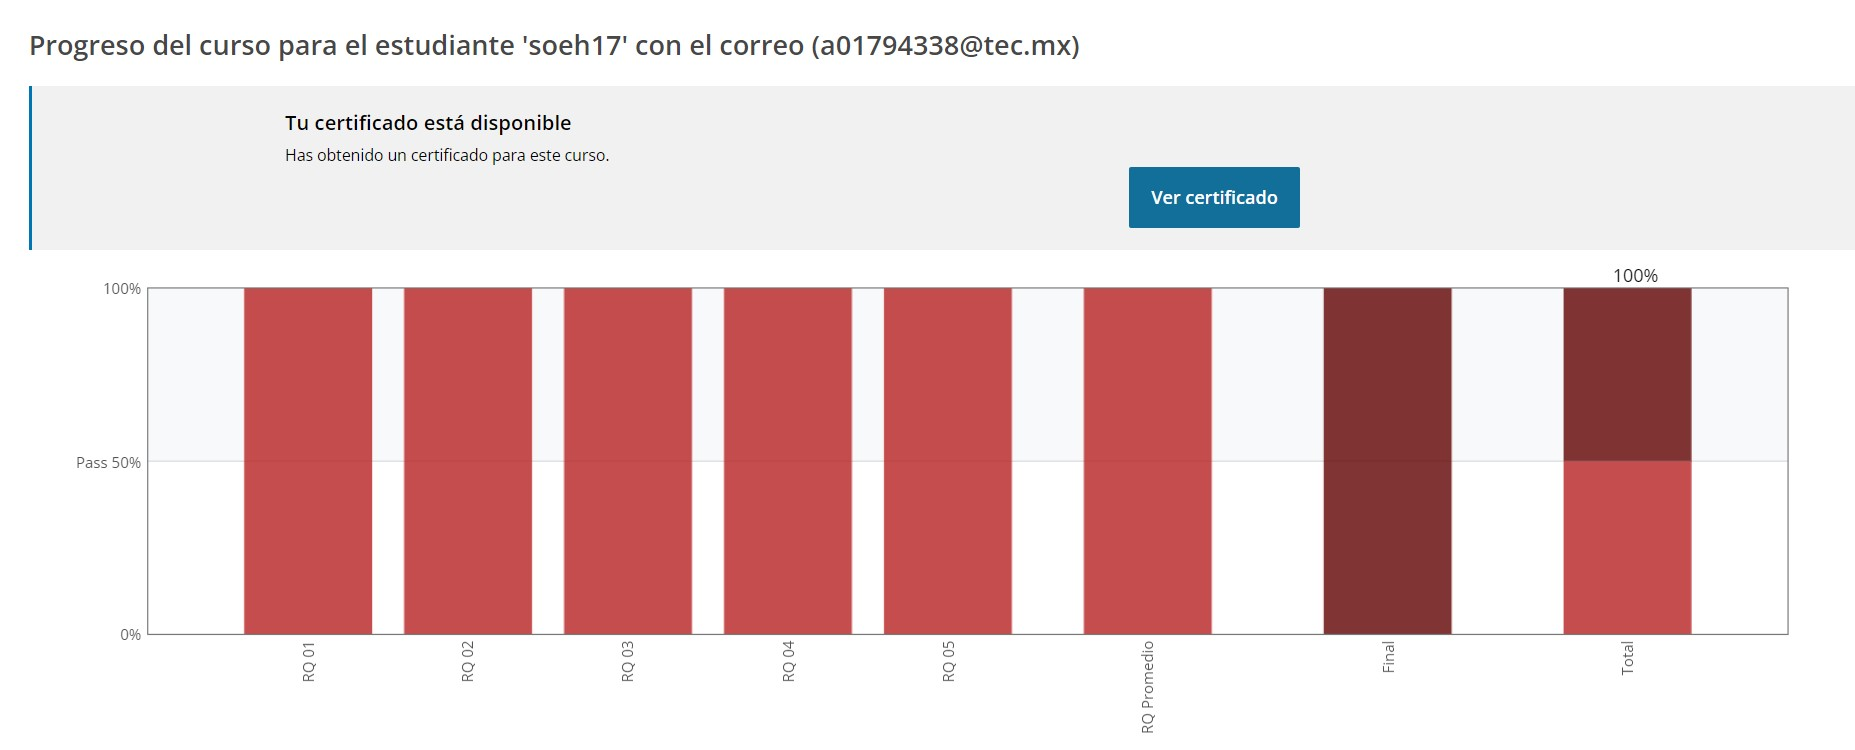

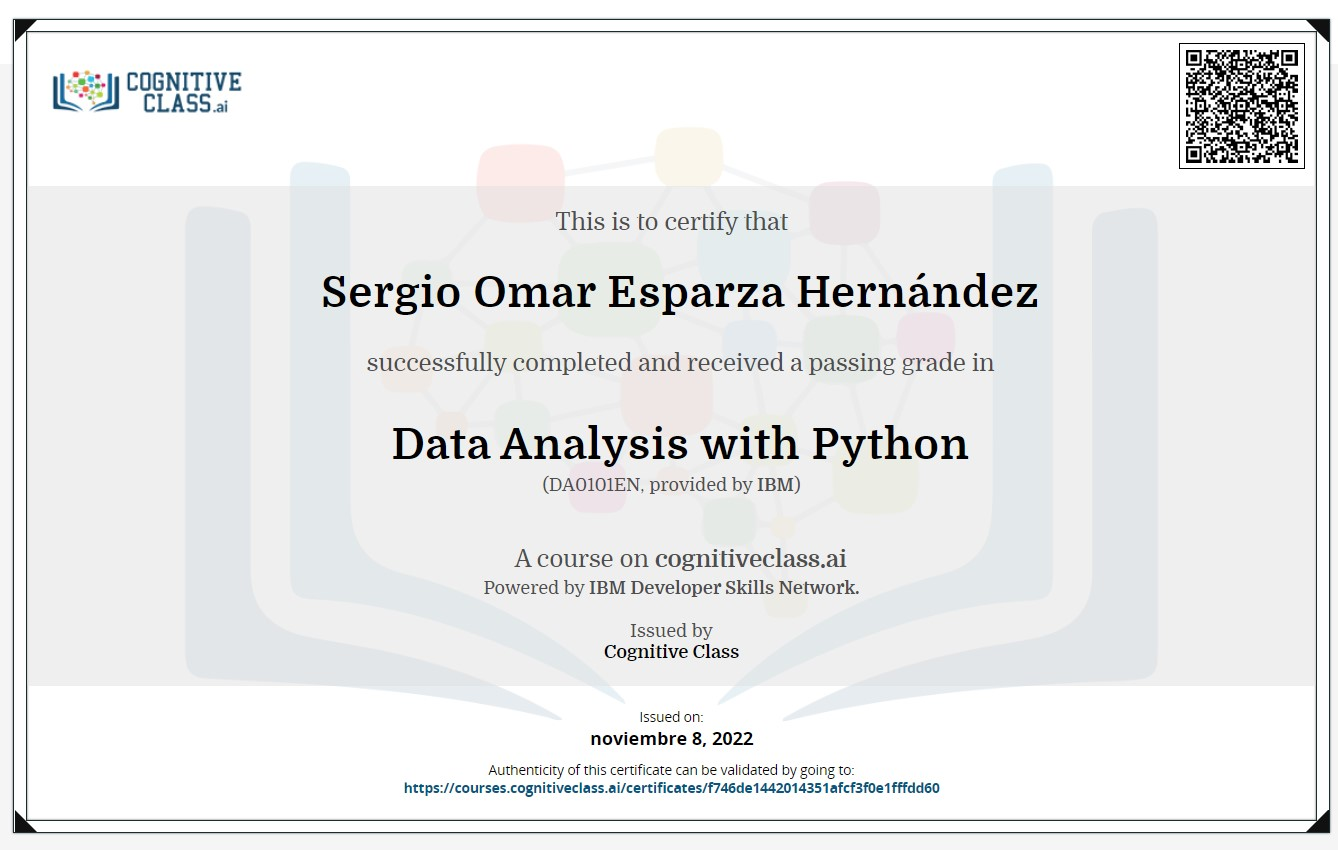